In [1]:
#Import pacakges for wrangling and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Import data file
mushroom_data = pd.read_csv("C:/Users/evere/OneDrive/Documents/Springboard/Capstone Project/MushroomDataset/secondary_data.csv", sep=';')

In [3]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
#Let's look at at columns missing the most values
missing = pd.concat([mushroom_data.isnull().sum(), 100 * mushroom_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
class,0,0.000000
has-ring,0,0.000000
stem-color,0,0.000000
habitat,0,0.000000
stem-height,0,0.000000
gill-color,0,0.000000
stem-width,0,0.000000
does-bruise-or-bleed,0,0.000000
cap-color,0,0.000000
cap-shape,0,0.000000


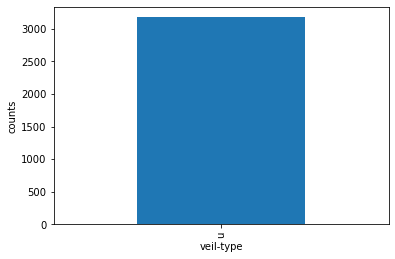

In [5]:
#veil-type has 95% of it's values missing. Let's see what the data looks like.

mushroom_data['veil-type'].value_counts().plot.bar()
plt.xlabel('veil-type')
plt.ylabel('counts')
plt.show()

In [8]:
mushroom_data.drop('veil-type',axis=1,inplace=True)

In [14]:
#Let's fill in empty values with unkowns
mushroom_data = mushroom_data.fillna(value='unknown')

In [7]:
#For convience let's rename 'class' to poisonous 
mushroom_data.rename(columns={'class':'poisonous'},inplace=True)

In [15]:
mushroom_data.isnull().sum()

poisonous               0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64